### Resumen
*El conjunto de entrenamiento (X_train, y_train) se usó para:*

1. Ajustar el pipeline con GridSearchCV.

2. Encontrar la mejor combinación de hiperparámetros.

*El conjunto de test es como un "examen final":*

1. Se usa una única vez al final.

2. Mide el rendimiento del modelo sobre datos que nunca vio antes.

3. Sirve para evaluar si el modelo generaliza bien.



### Analisis con FairLear
#### Buscamos ver si el modelo favorece o perjudica más a ciertos grupos.
es decir, vamos a analizar la equidad con Fairlearn sobre nuestro mejor modelo, usando las variables más sensibles. En este contexto, las más comunes suelen ser:

* gender

* parental_education_level

* internet_quality

* mental_health_rating

Estas variables pueden reflejar condiciones sociales o estructurales que podrían estar asociadas a desigualdades.



In [ ]:
!pip install fairlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 2.4 MB/s eta 0:00:00


In [ ]:
from fairlearn.metrics import MetricFrame

#from fairlearn.widget import FairlearnDashboard


 Métricas por grupo para: Gender
              MSE        R²
gender                     
Female  23.987103  0.906863
Male    29.027161  0.887745
Other    8.683028  0.950964


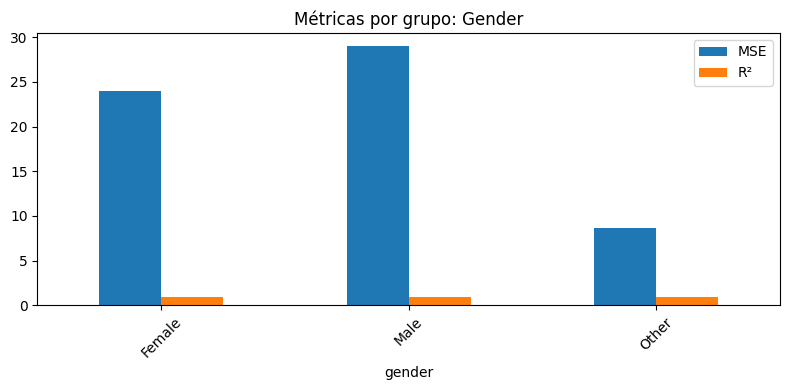


 Métricas por grupo para: Parental Education
                                MSE        R²
parental_education_level                     
Bachelor                  23.131643  0.922429
High School               30.927536  0.866287
Master                    21.331236  0.899390


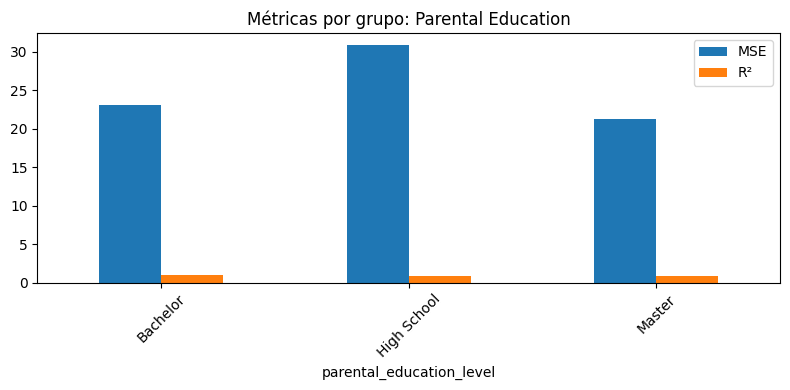


 Métricas por grupo para: Internet Quality
                        MSE        R²
internet_quality                     
Average           27.419395  0.901109
Good              25.316311  0.884635
Poor              25.321964  0.896796


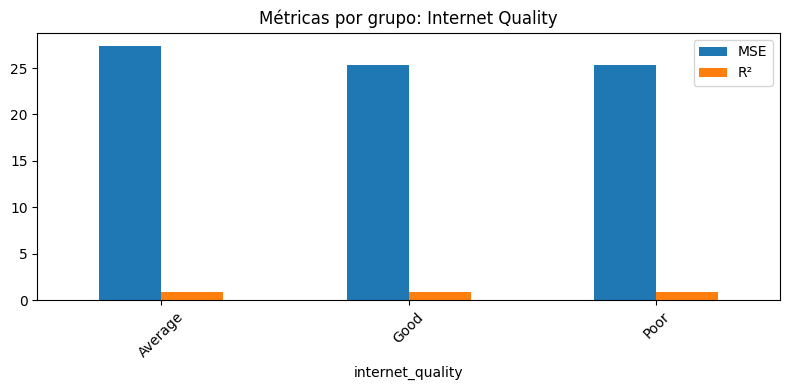


 Métricas por grupo para: Mental Health Rating
                            MSE        R²
mental_health_rating                     
1                     30.566576  0.923623
2                     25.258491  0.870511
3                     31.332563  0.813157
4                     31.397676  0.896664
5                     25.468798  0.903109
6                     26.222145  0.862892
7                     18.982704  0.904071
8                     24.375117  0.875011
9                     17.630620  0.784481
10                    25.806208  0.897088


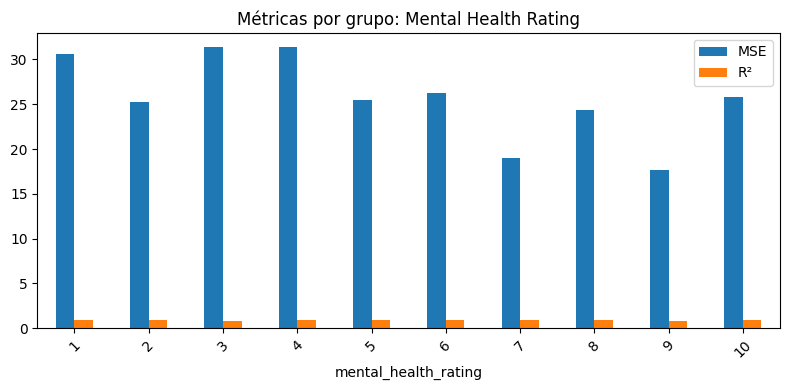

In [ ]:
###Variables sensibles a evaluar
sensitive_features = {
    "Gender": X_test["gender"],
    "Parental Education": X_test["parental_education_level"],
    "Internet Quality": X_test["internet_quality"],
    "Mental Health Rating": X_test["mental_health_rating"]
}

# Evaluamos con las métricas clásicas
metrics = {
    "MSE": mean_squared_error,
    "R²": r2_score
}

# Diccionario para guardar resultados por grupo
resultados_equidad = {}

for nombre, feature in sensitive_features.items():
    mf = MetricFrame(
        metrics=metrics,
        y_true=y_test,
        y_pred=mejor_modelo.predict(X_test),
        sensitive_features=feature
    )
    resultados_equidad[nombre] = mf
    print(f"\n Métricas por grupo para: {nombre}")
    print(mf.by_group)

    # Gráfico
    mf.by_group.plot(kind="bar", title=f"Métricas por grupo: {nombre}", figsize=(8, 4))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### CONCLUSIONES SOBRE FAIRLEARN:


1.   **Género (Gender)**:
      MSE (Error cuadrático medio): El modelo es más preciso para "Other", con un error más bajo. Tiene un peor rendimiento para "Male".

      R² (Coef. de determinación): Aunque todos los valores son buenos (>0.88), hay una pequeña diferencia entre "Other" (0.95) y "Male" (0.88).

      **Conclusión:** No hay disparidades graves, pero podríamos monitorear el desempeño en "Male", que tiene el peor error. El grupo "Other" es pequeño probablemente, lo cual también puede sesgar esta métrica.


2.   **Nivel educativo de los padres (Parental Education):**
      El modelo rinde peor en estudiantes con padres que tienen solo secundaria, tanto en MSE como en R².

      Las mejores métricas son para quienes tienen padres con estudios superiores.

      **Conclusión:** Hay disparidad notable. El modelo es menos preciso para estudiantes con menor nivel educativo en el hogar, lo cual puede reforzar desigualdades.


3.    **Calidad de Internet (Internet Quality):**
      Muy consistente entre grupos. Las diferencias en MSE y R² son mínimas.

      **Conclusión:** No hay disparidad significativa por calidad de internet.

4.    **Salud mental (Mental Health Rating):**
      Claramente, el modelo predice peor para estudiantes con puntajes medios de salud mental (ej.: 3 y 4).

      Predice mejor para puntajes altos (7, 9).

      **Conclusión:** Posible sesgo relacionado al estado emocional o bienestar. Sería interesante ver si estas categorías están correlacionadas con otras variables (como sueño, dieta, etc.).


---




## **Probando Modelos con Pycaret**
### ¿Qué hace PyCaret?
PyCaret automatiza muchas tareas comunes del flujo de trabajo de machine learning, como:

* Preprocesamiento de datos (limpieza, codificación, escalado, imputación, etc.)

* Entrenamiento de múltiples modelos con una sola línea de código

* Comparación automática de modelos

* Selección del mejor modelo

* Optimización de hiperparámetros

* Interpretación del modelo

* Guardado y despliegue del modelo


---



### A continuacion instalamos las librerias de mlflow, Pycaret y ngrok la cual nos permite utilizar un proxy reverso ya que estamos trabajando con google colab.
### **ngrok** es una herramienta que nos permite crear un túnel seguro desde internet a tu computadora o servidor local. Es como abrir una puerta temporal en internet para acceder a algo que estás ejecutando localmente.

## **¿Para qué sirve?**
### Por ejemplo, si tenemos una aplicación web o un servidor en nuestra máquina o en Google Colab, con ngrok podemos obtener un link público (como https://xyz.ngrok.io) para acceder a esa app desde cualquier navegador, incluso desde el celular o mostrarla a otra persona.

### **MLFLOW**:
### Es una app o servicio que permite hacer todo el tracking de los modelos de machine learning desde el inicio hasta su despliegue. Es decir nos ayuda a gestionar el ciclo de vida completo de un modelo de Machine Learning.

### **FLask**:
### Vamos a necesitar flask para el despliegue ya que queres acer una api para poder ahcer consultas con nuestro modelo, para esto necesitamos un servicio web o web service o pequeño server web donde podamos alojar y consultar nuestra API esto nos los da flask.

### Entonces que nos permite hacer el Framework web llamado flask?:


*   Recibir y responder a peticiones HTTP (como cuando alguien entra a un sitio)
*   Enviar HTML al navegador
*   Enviar HTML al navegador
*   Crear formularios y rutas (páginas distintas)
*   Hacer APIs REST (muy usado en machine learning)




In [ ]:
!pip install pyngrok flask
!pip uninstall -y pycaret mlflow #desisntalamos pycaret y mlflow por si hay alguna version previamente instalada
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/1

In [ ]:
!pip install mlflow==2.16.0 # instalamos esta version porque es la que está andando con pycaret

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.9/722.9 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.0/119.0 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.9/194.9 kB 12.7 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found ex

### ¿ Donde guardamos los datos de mlflow?
### Como estamos usando Colab que está en el ecosistema de google los guardamos en el google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

# Definimos dónde MLflow guardará todo:
MLFLOW_ROOT = "/content/drive/MyDrive/mlflow_runs"

## Configuramos MLFlow

In [ ]:
import mlflow
mlflow.set_tracking_uri(f"file://{MLFLOW_ROOT}")

### Arrancamos MLFlow

In [ ]:
import subprocess, time
mlflow_server = subprocess.Popen([
    "mlflow", "ui",
    "--backend-store-uri", f"file://{MLFLOW_ROOT}",
    "--port", "5000"
])
time.sleep(5)

# Usamos NGROK para proxy reverso y poder acceder.
from pyngrok import ngrok, conf
import getpass

print("Ingresar auth token de ngrok:  https://dashboard.ngrok.com/auth")
conf.get_default().auth_token = getpass.getpass()

port = 5000
public_url = ngrok.connect(port).public_url
print(f' * ngrok tunnel "{public_url}" -> "http://127.0.0.1:{port}"')


Ingresar auth token de ngrok:  https://dashboard.ngrok.com/auth
··········
 * ngrok tunnel "https://314a-34-21-56-251.ngrok-free.app" -> "http://127.0.0.1:5000"


### Antes de configurar y usar Pycaret debemos preparar nuevamene nuestro dataset

In [ ]:
#df = df.drop(columns=["student_id"])


# Columnas categóricas
#categorical_cols = [
#    "gender",
#    "part_time_job",
#    "diet_quality",
#    "parental_education_level",
#    "internet_quality",
#    "extracurricular_participation"
#]

# One-hot encoding
#df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Convertir booleanos a 0/1
#df_encoded = df_encoded.astype(int)

# Ver resultado
#print(df_encoded.head())



# Definimos columnas categóricas
categorical_cols = [
    "gender",
    "part_time_job",
    "diet_quality",
    "parental_education_level",
    "internet_quality",
    "extracurricular_participation"
]


# Aplicar One-Hot Encoding (NO eliminamos ninguna categoría)
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

# Convertir posibles valores booleanos a enteros (True/False → 1/0)
df_encoded = df_encoded.astype(int)

# Mostrar las primeras filas para verificar
print(df_encoded.head())
print(df_encoded.columns.tolist())

   age  study_hours_per_day  social_media_hours  netflix_hours  \
0   23                    0                   1              1   
1   20                    6                   2              2   
2   21                    1                   3              1   
3   23                    1                   3              1   
4   19                    5                   4              0   

   attendance_percentage  sleep_hours  exercise_frequency  \
0                     85            8                   6   
1                     97            4                   6   
2                     94            8                   1   
3                     71            9                   4   
4                     90            4                   3   

   mental_health_rating  exam_score  gender_Female  ...  diet_quality_Good  \
0                     8          56              1  ...                  0   
1                     8         100              1  ...                  1   
2 

### Cargamos y configuramos PyCaret con MLFlow para hacer el seguimiento

In [ ]:
from pycaret.regression import setup, compare_models, finalize_model, save_model

#Creamos el experimento en MLflow
mlflow.set_experiment("Predicciones con el dataset Desempeño académico de los estudiantes en base a sus hábitos2")

exp = setup(
    data=df_encoded,
    target='exam_score',
    session_id=42,
    log_experiment=True,
    experiment_name='Predicciones con el dataset Desempeño académico de los estudiantes en base a sus hábitos2',
    log_plots=True          # registra gráficos (conf matrix, etc.)
)

2025/05/29 19:26:03 INFO mlflow.tracking.fluent: Experiment with name 'Predicciones con el dataset Desempeño académico de los estudiantes en base a sus hábitos2' does not exist. Creating a new experiment.


,Description,Value
0,Session id,42
1,Target,exam_score
2,Target type,Regression
3,Original data shape,"(1000, 25)"
4,Transformed data shape,"(1000, 25)"
5,Transformed train set shape,"(700, 25)"
6,Transformed test set shape,"(300, 25)"
7,Numeric features,24
8,Preprocess,True
9,Imputation type,simple


### Entrenamos y comparamos los modelos.

In [ ]:
best = compare_models()

# Finaliza el modelo para habilitar predicciones en producción
model = finalize_model(best)

# Guarda localmente (un .pkl) y también registra en MLflow
save_model(model, 'modelo_Estudiantes')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lar,Least Angle Regression,4.8845,38.0187,6.1569,0.8612,0.0961,0.0767,0.0460
br,Bayesian Ridge,4.8821,38.0472,6.1592,0.8612,0.0962,0.0767,0.0490
ridge,Ridge Regression,4.8831,38.0744,6.1614,0.8611,0.0962,0.0767,0.0370
lr,Linear Regression,4.8834,38.0819,6.1619,0.8610,0.0961,0.0767,0.6340
huber,Huber Regressor,4.9207,38.5728,6.2032,0.8593,0.0962,0.0769,0.0800
lasso,Lasso Regression,5.0495,40.4248,6.3470,0.8539,0.1018,0.0808,0.0390
llar,Lasso Least Angle Regression,5.0496,40.4248,6.3470,0.8539,0.1018,0.0808,0.0460
gbr,Gradient Boosting Regressor,5.0988,41.3961,6.4049,0.8465,0.1020,0.0807,0.1290
lightgbm,Light Gradient Boosting Machine,5.2523,43.5820,6.5761,0.8382,0.1046,0.0832,0.2370
en,Elastic Net,5.6516,49.6289,7.0317,0.8224,0.1163,0.0927,0.0400


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/pycaret/internal/pycaret_experiment/supervised_experiment.py:339: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



2025/05/29 19:27:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/05/29 19:27:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/05/29 19:27:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/05/29 19:27:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/05/29 19:27:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/05/29 19:27:07 

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'study_hours_per_day',
                                              'social_media_hours',
                                              'netflix_hours',
                                              'attendance_percentage',
                                              'sleep_hours',
                                              'exercise_frequency',
                                              'mental_health_rating',
                                              'gender_Female', 'gender_Male',
                                              'gender_Other', 'part_time_job_No',
                                              'part_time_job_Yes',
                                              'diet_quality_Fair',
                                              'diet...
                                              'internet_quality_Poor',
                        

### en la primera pasada nos arrojó esto:

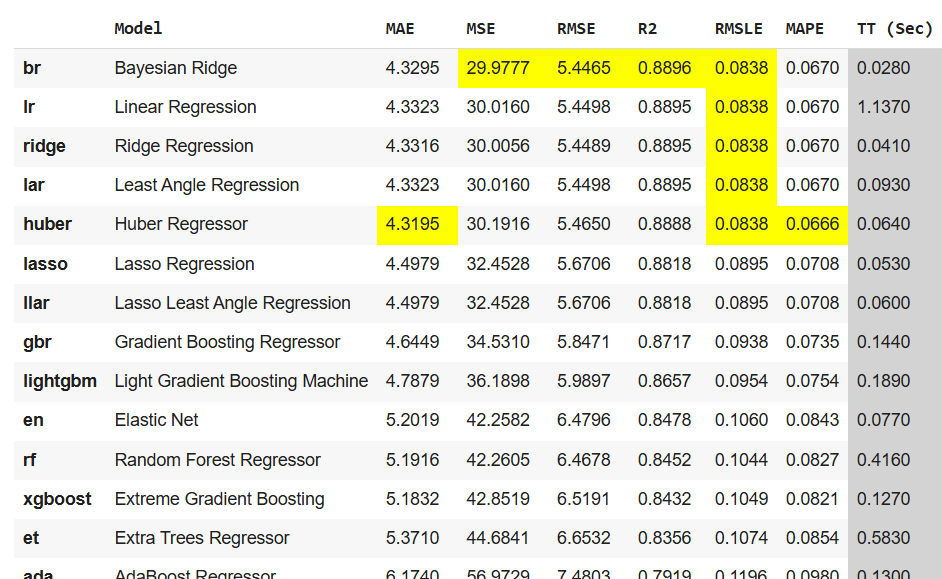

suponemos que es por el método de onehot encoding que usamos ya que este usa variables booleanas, al pasar los booleanos a int(0 y 1 ) nos dió lo que se ve